In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collecting 

In [2]:
def load_dataset():
    file = ("2022.csv")
    df = pd.read_csv(file)
    return df

load_dataset()

,Google Cloud Region,Location,Google CFE,Grid carbon intensity (gCO2eq / kWh)
0,asia-east1,Taiwan,0.18,453
1,asia-east2,Hong Kong,0.28,360
2,asia-northeast1,Tokyo,0.16,463
3,asia-northeast2,Osaka,0.32,383
4,asia-northeast3,Seoul,0.31,425
5,asia-south1,Mumbai,0.24,555
6,asia-south2,Delhi,0.23,632
7,asia-southeast1,Singapore,0.04,372
8,asia-southeast2,Jakarta,0.13,580
9,australia-southeast1,Sydney,0.27,538


In [3]:
def print_summarize_dataset(df):
    print("Data Types:")
    print(df.dtypes)
    print()
    print("Statistical summary:")
    display(df.describe())
    
df = load_dataset()
print_summarize_dataset(df)

Data Types:
Google Cloud Region                      object
Location                                 object
Google CFE                              float64
Grid carbon intensity (gCO2eq / kWh)      int64
dtype: object

Statistical summary:


,Google CFE,Grid carbon intensity (gCO2eq / kWh)
count,36.000000,36.000000
mean,0.518056,337.638889
std,0.310233,191.664462
min,0.020000,0.000000
25%,0.267500,163.750000
50%,0.420000,357.000000
75%,0.855000,466.250000
max,1.000000,738.000000


# Data Exploration

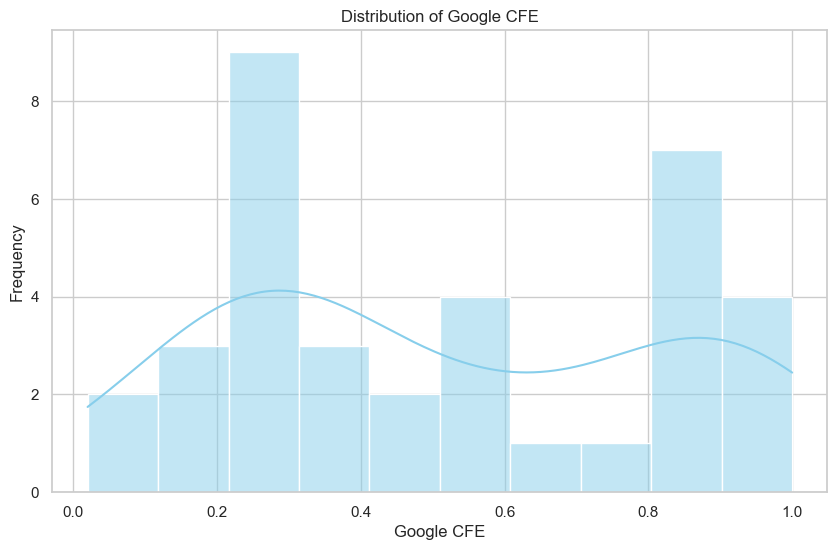

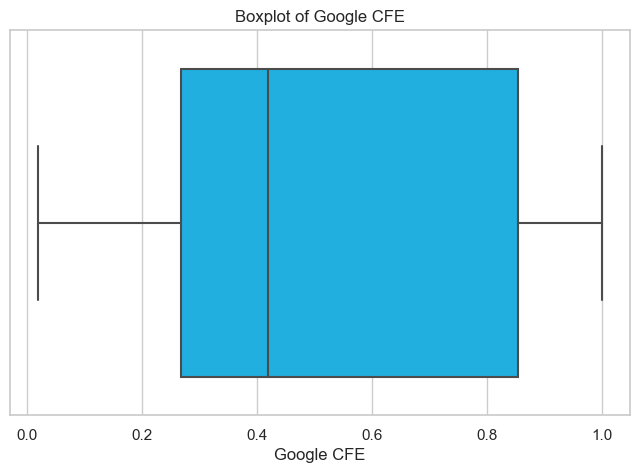

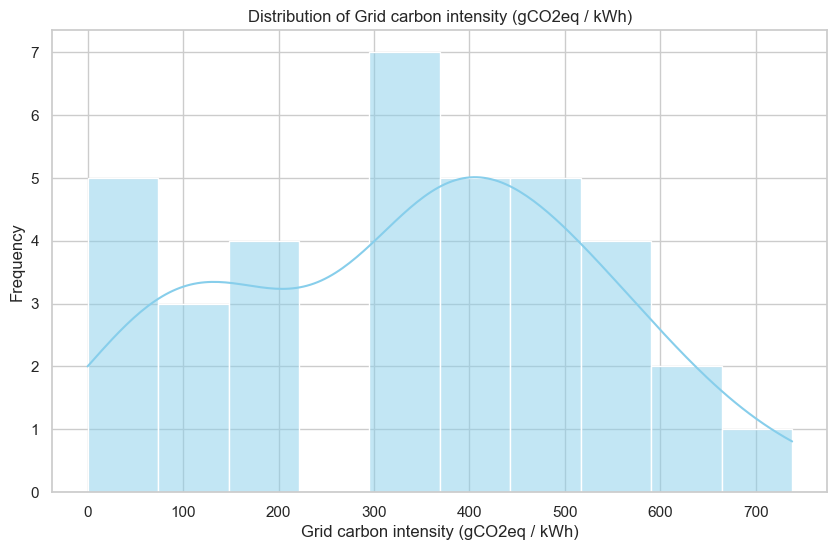

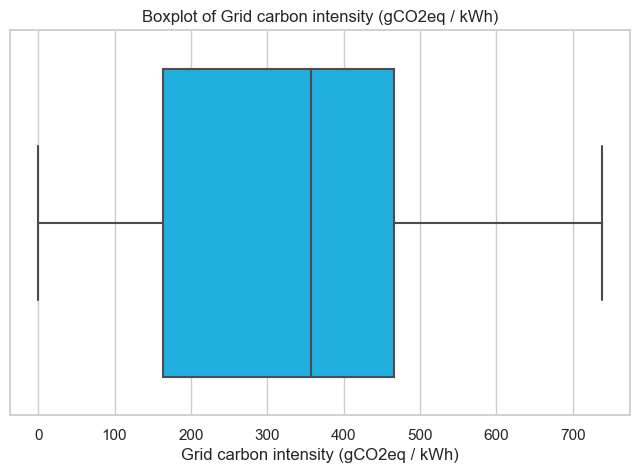

In [4]:
def print_histograms(df):
    columns = ['Google CFE', 'Grid carbon intensity (gCO2eq / kWh)']
    sns.set(style="whitegrid", palette="pastel")
    
    for column in columns:
        #Histograms
        plt.figure(figsize=(10,6))
        sns.histplot(df[column], kde=True, color='skyblue', bins=10)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()
        
        #Boxplot
        plt.figure(figsize=(8,5))
        sns.boxplot(x=df[column], color='deepskyblue')
        plt.title(f'Boxplot of {column}')
        plt.xlabel(column)
        plt.show()
        
print_histograms(df)

##### Tendencia General de Google CFE: A lo largo de los años 2019 a 2022, se observa una tendencia estable en la mediana e IQR de Google CFE. La distribución muestra una persistente bimodalidad, sugiriendo que las regiones están divididas en términos de adopción de energía libre de carbono. No ha habido cambios significativos en la tendencia general.
##### Mejoras en Grid Carbon Intensity: En comparación con 2019 y 2020, los años 2021 y 2022 han mostrado una reducción en la intensidad de carbono, con picos más bajos y una mediana que ha disminuido. Esto indica una mejora en la sostenibilidad energética en varias regiones.

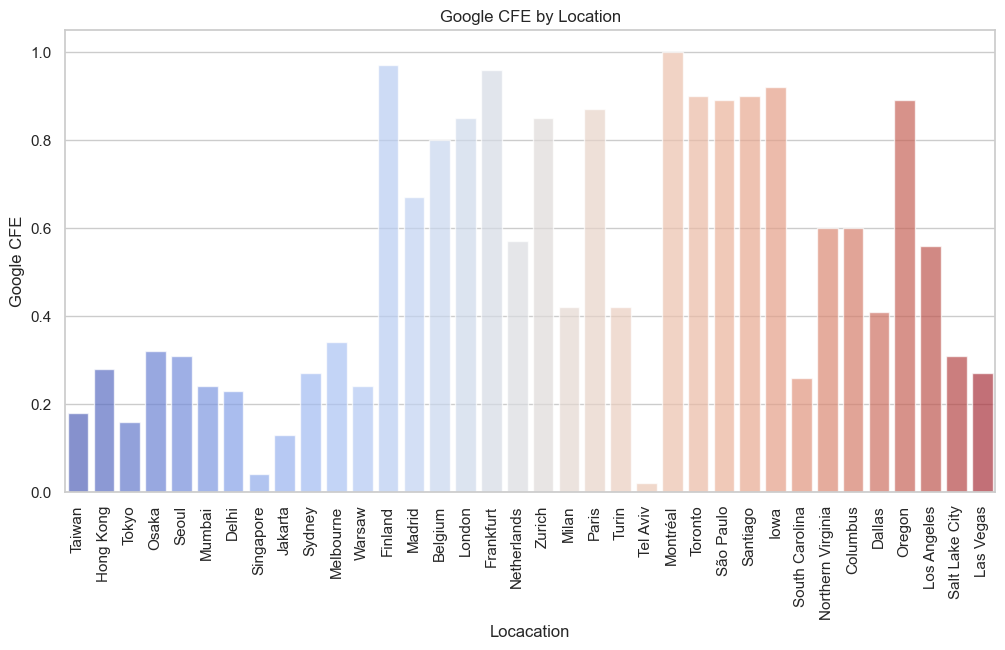

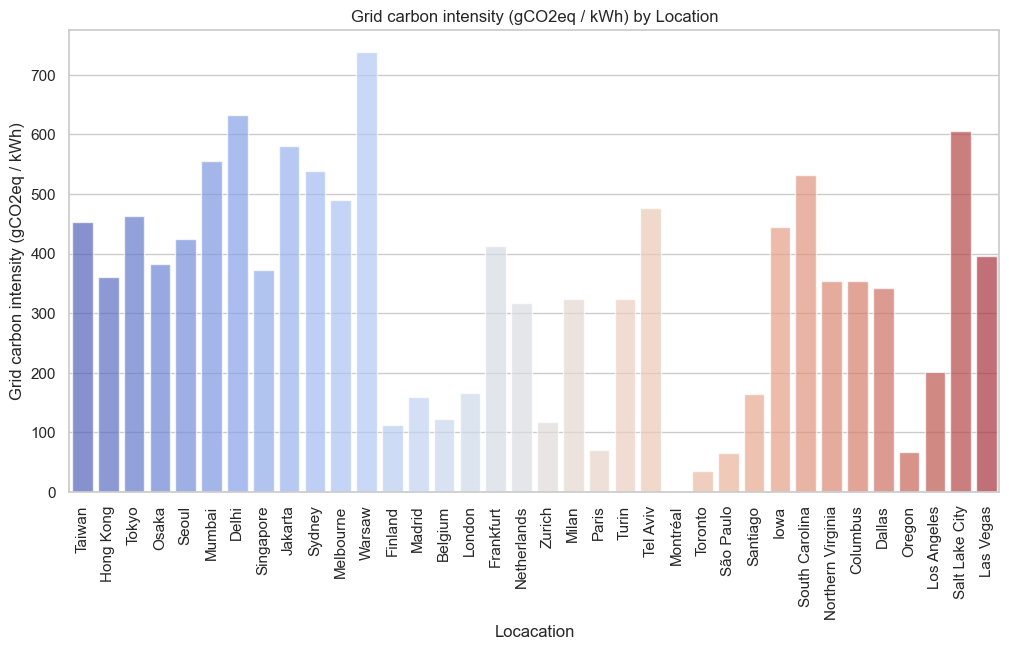

In [5]:
def bar_chart(df):
    df = df.dropna(subset=['Google CFE', 'Grid carbon intensity (gCO2eq / kWh)'])
    
    columns = ['Google CFE', 'Grid carbon intensity (gCO2eq / kWh)']
    
    for column in columns:
        plt.figure(figsize=(12,6))
        sns.barplot(x='Location', y=column, data=df, palette='coolwarm', alpha=0.7)
        plt.xticks(rotation=90)
        plt.title(f'{column} by Location')
        plt.xlabel('Locacation')
        plt.ylabel(column)
        plt.show()

bar_chart(df)

In [6]:
import folium
from folium.plugins import HeatMap

In [7]:
# Define a function to create a geographic heat map
def geographic_heat_map(df):
    # Dictionary of approximate coordinates for each Google Cloud region
    coordinates = {
        'asia-east1': (25.0330, 121.5654),  # Taiwan
        'asia-east2': (22.3193, 114.1694),  # Hong Kong
        'asia-northeast1': (35.6895, 139.6917),  # Tokyo
        'asia-northeast2': (34.6937, 135.5023),  # Osaka
        'asia-northeast3': (37.5665, 126.9780),  # Seoul
        'asia-south1': (19.0760, 72.8777),  # Mumbai
        'asia-southeast1': (1.3521, 103.8198),  # Singapore
        'asia-southeast2': (-6.2088, 106.8456),  # Jakarta
        'australia-southeast1': (-33.8688, 151.2093),  # Sydney
        'europe-north1': (60.1699, 24.9384),  # Finland
        'europe-west1': (50.8503, 4.3517),  # Belgium
        'europe-west2': (51.5074, -0.1278),  # London
        'europe-west3': (50.1109, 8.6821),  # Frankfurt
        'europe-west4': (52.3676, 4.9041),  # Netherlands
        'europe-west6': (47.3769, 8.5417),  # Zurich
        'northamerica-northeast1': (45.5017, -73.5673),  # Montreal
        'southamerica-east1': (-23.5505, -46.6333),  # Sao Paulo
        'us-central1': (41.8780, -93.0977),  # Iowa
        'us-east1': (33.8361, -81.1637),  # South Carolina
        'us-east4': (39.0438, -77.4874),  # Northern Virginia
        'us-west1': (45.5234, -122.6762),  # Oregon
        'us-west2': (34.0522, -118.2437),  # Los Angeles
        'us-west3': (40.7608, -111.8910),  # Salt Lake City
        'us-west4': (36.1699, -115.1398)   # Las Vegas
    }
    
    # Create a pandas DataFrame with the added coordinates
    df['Coordinates'] = df['Google Cloud Region'].map(coordinates)
    
    # Create a basemap centered on mean coordinates
    map_center = [20, 0] # Approximate center of the map
    m = folium.Map(location=map_center, zoom_start=2)
    
    # Create a list of data for the heat map
    heat_data = [[row['Coordinates'][0], row['Coordinates'][1], row['Grid carbon intensity (gCO2eq / kWh)']] 
                 for index, row in df.dropna(subset=['Coordinates', 'Grid carbon intensity (gCO2eq / kWh)']).iterrows()]
    
    # Add the HeatMap to the map
    HeatMap(heat_data, radius=15).add_to(m)
    
    return m

geographic_map = geographic_heat_map(df)
geographic_map.save("geographic_heat_map_2022.html") # Save the map as HTML file

In [8]:
def compute_correlations_matrix(df):
    columns = ['Google CFE', 'Grid carbon intensity (gCO2eq / kWh)']
    correlations = df[columns].corr(method='pearson')
    return correlations

compute_correlations_matrix(df)

,Google CFE,Grid carbon intensity (gCO2eq / kWh)
Google CFE,1.000000,-0.785141
Grid carbon intensity (gCO2eq / kWh),-0.785141,1.000000


#### Conclusión de la Correlación del Año 2022:
##### Fuerte Relación Inversa: El valor de correlación de -0.785141 refuerza la idea de que hay una fuerte relación inversa entre el uso de energía libre de carbono y la intensidad de carbono de la red. Esto sugiere que las regiones que están adoptando más fuentes de energía renovables están logrando reducir su intensidad de carbono.

La reducción en la correlación negativa de -0.85 a -0.785 sigue siendo una buena señal de que aumentar el uso de energía libre de carbono es eficaz para reducir la intensidad de carbono. Sin embargo, también indica la necesidad de considerar estrategias adicionales o diversificadas para seguir impulsando mejoras en la sostenibilidad energética, especialmente en regiones donde el beneficio marginal está disminuyendo.